# gym-swarm
# Author: Robert Tjarko Lange
## A simple test installation of the environment

In [1]:
# Install the environment from the command line
!pip install -e .

Obtaining file:///Users/rtl/Dropbox/PHD_ECN/LAB_ROTATION_2_SPREKELER/gym-swarm
  Found existing installation: gym-swarm 0.0.1
    Uninstalling gym-swarm-0.0.1:
      Successfully uninstalled gym-swarm-0.0.1
  Running setup.py develop for gym-swarm


In [2]:
# Run unit tests
!python gym_swarm/tests/test.py

/Users/rtl/anaconda2/envs/swarm/lib/python3.6/site-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)
/Users/rtl/anaconda2/envs/swarm/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/Users/rtl/anaconda2/envs/swarm/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/Users/rtl/anaconda2/envs/swarm/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/Users/rtl/Dropbox/PHD_ECN/LAB_ROTATION_2_SPREKELER/gym-swarm/gym_swarm/envs/swarm_env.py:19: ResourceWarning: unclosed file <_io.BufferedReader name='

In [3]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

# Import the environment
import gym
import gym_swarm

# Import base modules
import time
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Make the environment and change the base params
num_agents = 10
obs_space_size=10

env = gym.make("Swarm-v0")
env.set_env_parameters(num_agents, obs_space_size, verbose=True)
state = env.reset()

/Users/rtl/anaconda2/envs/swarm/lib/python3.6/site-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)


Swarm Environment Parameters have been set to:
	 Number of Agents: 10
	 State Space: 10x10 Grid


In [5]:
class RandomAgents():
    """
    Class for simple random agents
    """
    def __init__(self, env):
        self.num_actions = env.action_space.n
        self.num_agents = env.num_agents

    def random_action(self):
        random_actions = np.random.randint(8, size=self.num_agents)
        return dict(enumerate(random_actions))

In [6]:
random_agent = RandomAgents(env)
max_steps = 10

Step: 1
Agent-Specific Rewards: {0: {'survival': 0, 'attraction': 0.07777777777777778, 'repulsion': -0.011111111111111112, 'alignment': -0.06341229756873942, 'sum': 0.0032543690979272427}, 1: {'survival': 0, 'attraction': 0.08888888888888889, 'repulsion': 0.0, 'alignment': -0.060157928470812166, 'sum': 0.028730960418076726}, 2: {'survival': 0, 'attraction': 0.07777777777777778, 'repulsion': 0.0, 'alignment': -0.057856742013183866, 'sum': 0.019921035764593913}, 3: {'survival': 0, 'attraction': 0.05555555555555555, 'repulsion': 0.0, 'alignment': -0.0476988135423717, 'sum': 0.00785674201318385}, 4: {'survival': 0, 'attraction': 0.06666666666666667, 'repulsion': -0.022222222222222223, 'alignment': -0.04674563090207275, 'sum': -0.002301186457628314}, 5: {'survival': 0, 'attraction': 0.08888888888888889, 'repulsion': 0.0, 'alignment': -0.057856742013183866, 'sum': 0.031032146875705026}, 6: {'survival': 0, 'attraction': 0.06666666666666667, 'repulsion': -0.011111111111111112, 'alignment': -0.

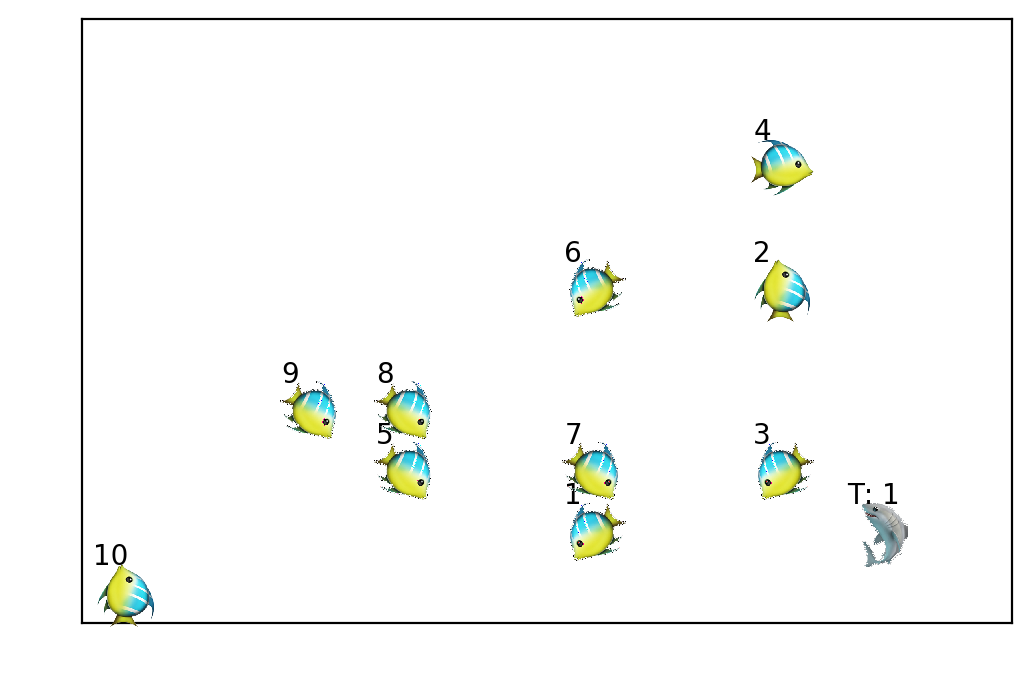

Step: 2
Agent-Specific Rewards: {0: {'survival': 0, 'attraction': 0.05555555555555555, 'repulsion': -0.022222222222222223, 'alignment': -0.042817259895480825, 'sum': -0.009483926562147499}, 1: {'survival': 0, 'attraction': 0.06666666666666667, 'repulsion': -0.011111111111111112, 'alignment': -0.06734066857533136, 'sum': -0.011785113019775806}, 2: {'survival': 0, 'attraction': 0.06666666666666667, 'repulsion': -0.011111111111111112, 'alignment': -0.04377044253577976, 'sum': 0.011785113019775792}, 3: {'survival': 0, 'attraction': 0.07777777777777778, 'repulsion': 0.0, 'alignment': -0.0617851130197758, 'sum': 0.015992664758001977}, 4: {'survival': 0, 'attraction': 0.05555555555555555, 'repulsion': -0.022222222222222223, 'alignment': -0.042817259895480825, 'sum': -0.009483926562147499}, 5: {'survival': 0, 'attraction': 0.07777777777777778, 'repulsion': 0.0, 'alignment': -0.051627184548963624, 'sum': 0.026150593228814155}, 6: {'survival': 0, 'attraction': 0.05555555555555555, 'repulsion': -

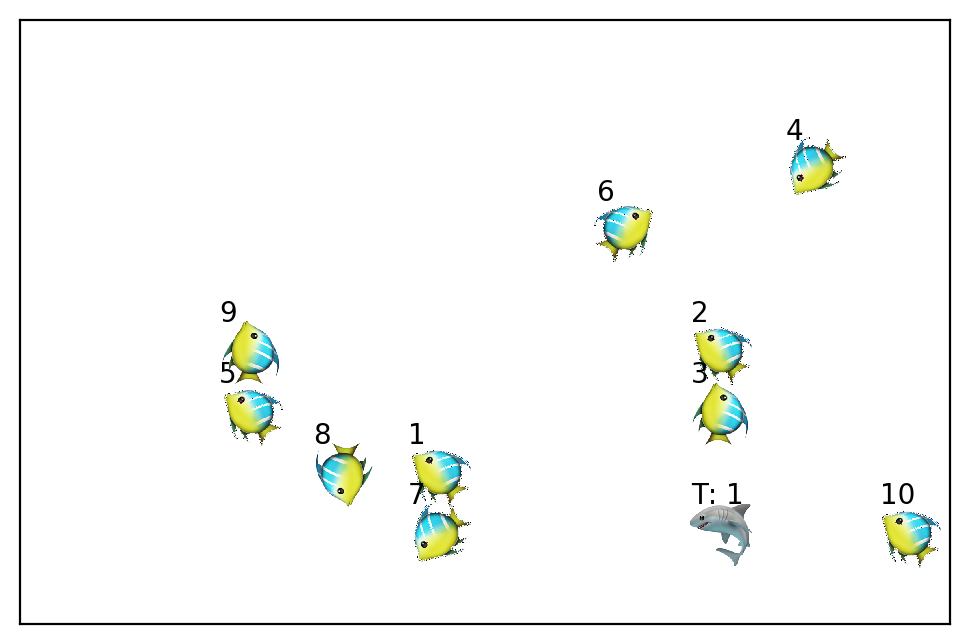

Step: 3
Agent-Specific Rewards: {0: {'survival': 0, 'attraction': 0.08888888888888889, 'repulsion': 0.0, 'alignment': -0.03821488698022421, 'sum': 0.05067400190866468}, 1: {'survival': 0, 'attraction': 0.044444444444444446, 'repulsion': -0.022222222222222223, 'alignment': -0.040516073437852525, 'sum': -0.0182938512156303}, 2: {'survival': 0, 'attraction': 0.06666666666666667, 'repulsion': -0.011111111111111112, 'alignment': -0.03821488698022421, 'sum': 0.01734066857533134}, 3: {'survival': 0, 'attraction': 0.06666666666666667, 'repulsion': 0.0, 'alignment': -0.05392837100659193, 'sum': 0.012738295660074735}, 4: {'survival': 0, 'attraction': 0.08888888888888889, 'repulsion': 0.0, 'alignment': -0.05718274010451919, 'sum': 0.031706148784369705}, 5: {'survival': 0, 'attraction': 0.07777777777777778, 'repulsion': 0.0, 'alignment': -0.032659331424668654, 'sum': 0.045118446353109125}, 6: {'survival': 0, 'attraction': 0.06666666666666667, 'repulsion': -0.011111111111111112, 'alignment': -0.072

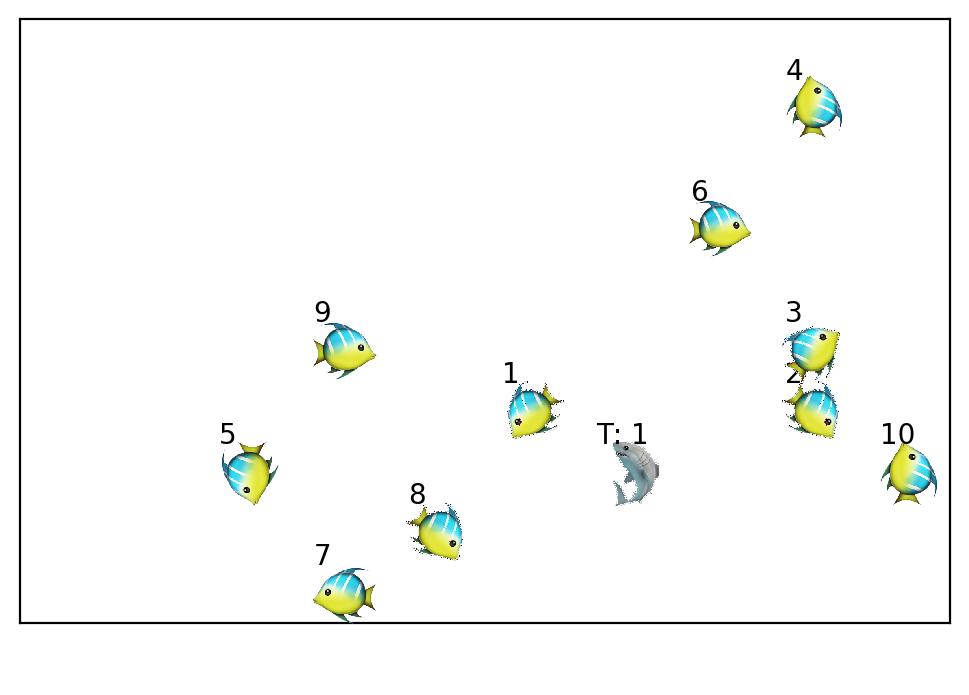

Step: 4
Agent-Specific Rewards: {0: {'survival': 0, 'attraction': 0.07777777777777778, 'repulsion': -0.011111111111111112, 'alignment': -0.0476988135423717, 'sum': 0.018967853124294963}, 1: {'survival': 0, 'attraction': 0.044444444444444446, 'repulsion': -0.03333333333333333, 'alignment': -0.06341229756873942, 'sum': -0.05230118645762831}, 2: {'survival': 0, 'attraction': 0.06666666666666667, 'repulsion': -0.022222222222222223, 'alignment': -0.05555555555555555, 'sum': -0.011111111111111113}, 3: {'survival': 0, 'attraction': 0.044444444444444446, 'repulsion': 0.0, 'alignment': -0.06341229756873942, 'sum': -0.018967853124294977}, 4: {'survival': 0, 'attraction': 0.06666666666666667, 'repulsion': -0.011111111111111112, 'alignment': -0.055555555555555546, 'sum': 6.938893903907228e-18}, 5: {'survival': 0, 'attraction': 0.07777777777777778, 'repulsion': -0.011111111111111112, 'alignment': -0.04769881354237169, 'sum': 0.018967853124294977}, 6: {'survival': 0, 'attraction': 0.0777777777777777

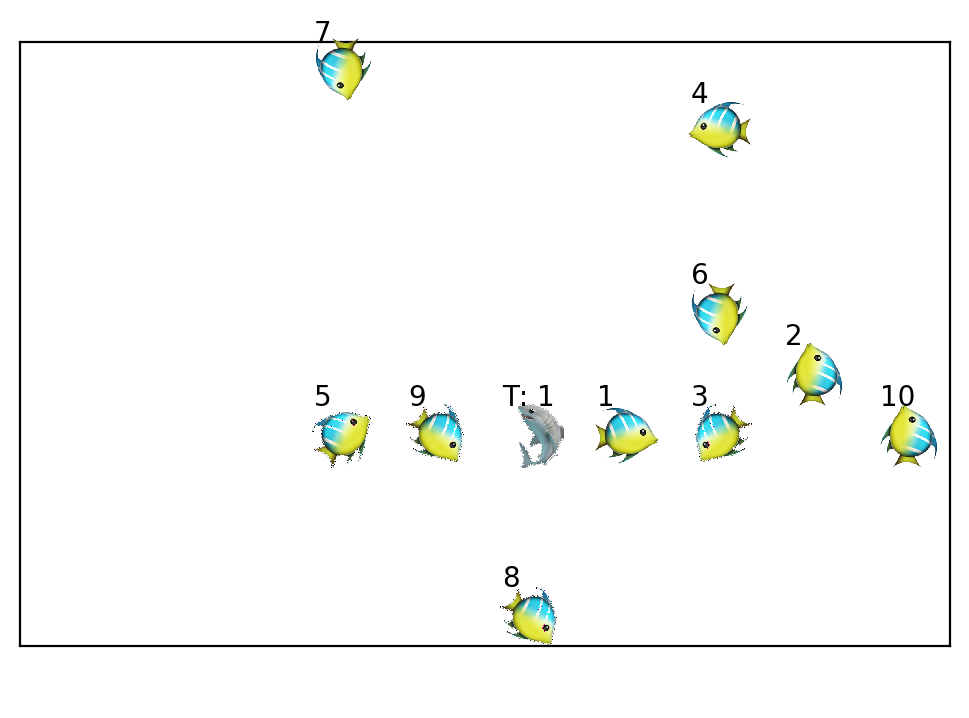

Step: 5
Agent-Specific Rewards: {0: {'survival': 0, 'attraction': 0.08888888888888889, 'repulsion': 0.0, 'alignment': -0.03103214687570503, 'sum': 0.05785674201318386}, 1: {'survival': 0, 'attraction': 0.05555555555555555, 'repulsion': -0.011111111111111112, 'alignment': -0.03103214687570503, 'sum': 0.01341229756873941}, 2: {'survival': 0, 'attraction': 0.07777777777777778, 'repulsion': -0.011111111111111112, 'alignment': -0.04214325798681614, 'sum': 0.024523408679850527}, 3: {'survival': 0, 'attraction': 0.07777777777777778, 'repulsion': 0.0, 'alignment': -0.07682459513747883, 'sum': 0.0009531826402989496}, 4: {'survival': 0, 'attraction': 0.06666666666666667, 'repulsion': -0.011111111111111112, 'alignment': -0.05, 'sum': 0.00555555555555555}, 5: {'survival': 0, 'attraction': 0.08888888888888889, 'repulsion': 0.0, 'alignment': -0.034286515973632276, 'sum': 0.05460237291525662}, 6: {'survival': 0, 'attraction': 0.06666666666666667, 'repulsion': 0.0, 'alignment': -0.031032146875705033, 

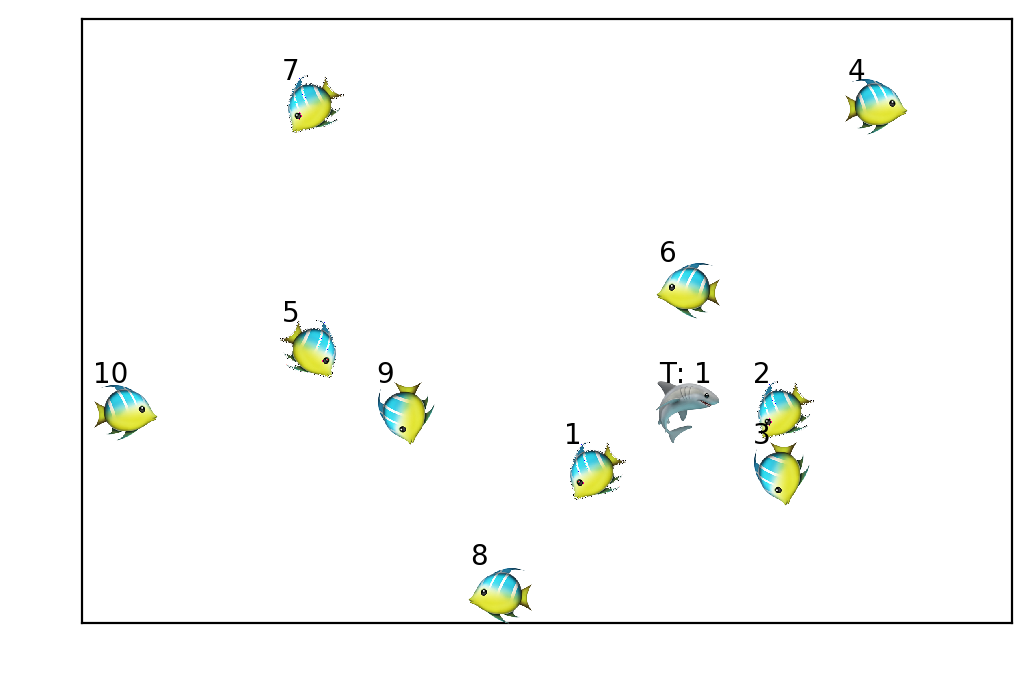

Step: 6
Agent-Specific Rewards: {0: {'survival': 0, 'attraction': 0.05555555555555555, 'repulsion': -0.022222222222222223, 'alignment': -0.06896785312429497, 'sum': -0.03563451979096165}, 1: {'survival': 0, 'attraction': 0.07777777777777778, 'repulsion': -0.011111111111111112, 'alignment': -0.044444444444444446, 'sum': 0.02222222222222222}, 2: {'survival': 0, 'attraction': 0.06666666666666667, 'repulsion': -0.011111111111111112, 'alignment': -0.057856742013183866, 'sum': -0.002301186457628314}, 3: {'survival': 0, 'attraction': 0.07777777777777778, 'repulsion': 0.0, 'alignment': -0.04214325798681613, 'sum': 0.03563451979096165}, 4: {'survival': 0, 'attraction': 0.05555555555555555, 'repulsion': -0.022222222222222223, 'alignment': -0.04214325798681613, 'sum': -0.008809924653482806}, 5: {'survival': 0, 'attraction': 0.1, 'repulsion': 0.0, 'alignment': -0.04769881354237169, 'sum': 0.05230118645762832}, 6: {'survival': 0, 'attraction': 0.07777777777777778, 'repulsion': 0.0, 'alignment': -0.

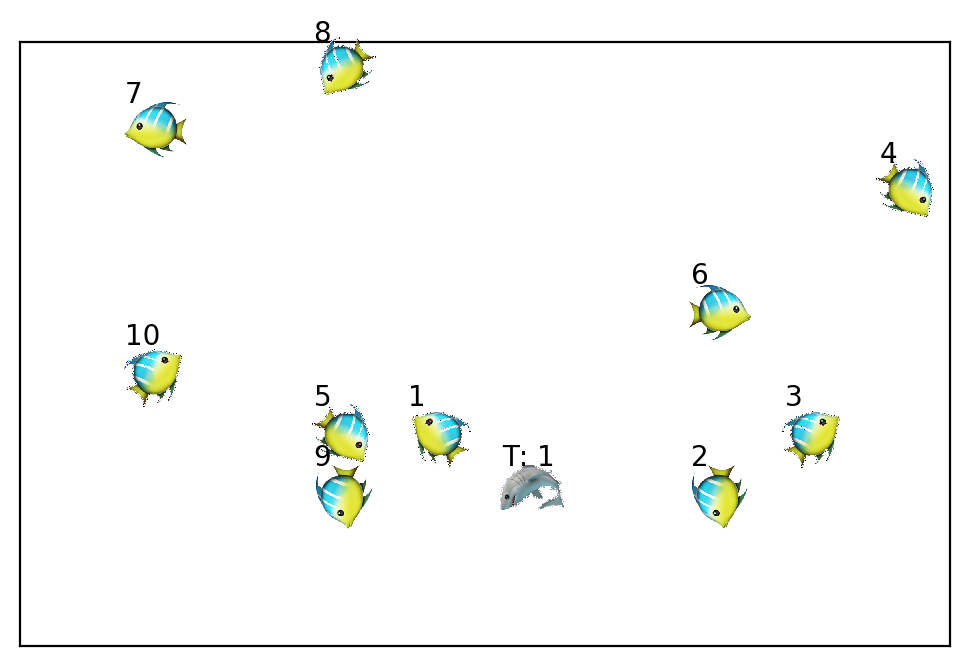

Step: 7
Agent-Specific Rewards: {0: {'survival': 0, 'attraction': 0.1, 'repulsion': 0.0, 'alignment': -0.05, 'sum': 0.05}, 1: {'survival': 0, 'attraction': 0.08888888888888889, 'repulsion': 0.0, 'alignment': -0.0634122975687394, 'sum': 0.025476591320149497}, 2: {'survival': 0, 'attraction': 0.1, 'repulsion': 0.0, 'alignment': -0.05, 'sum': 0.05}, 3: {'survival': 0, 'attraction': 0.08888888888888889, 'repulsion': 0.0, 'alignment': -0.05, 'sum': 0.03888888888888889}, 4: {'survival': 0, 'attraction': 0.08888888888888889, 'repulsion': -0.011111111111111112, 'alignment': -0.05, 'sum': 0.027777777777777776}, 5: {'survival': 0, 'attraction': 0.07777777777777778, 'repulsion': 0.0, 'alignment': -0.0476988135423717, 'sum': 0.030078964235406076}, 6: {'survival': 0, 'attraction': 0.08888888888888889, 'repulsion': 0.0, 'alignment': -0.06341229756873941, 'sum': 0.025476591320149483}, 7: {'survival': 0, 'attraction': 0.1, 'repulsion': 0.0, 'alignment': -0.0476988135423717, 'sum': 0.0523011864576283},

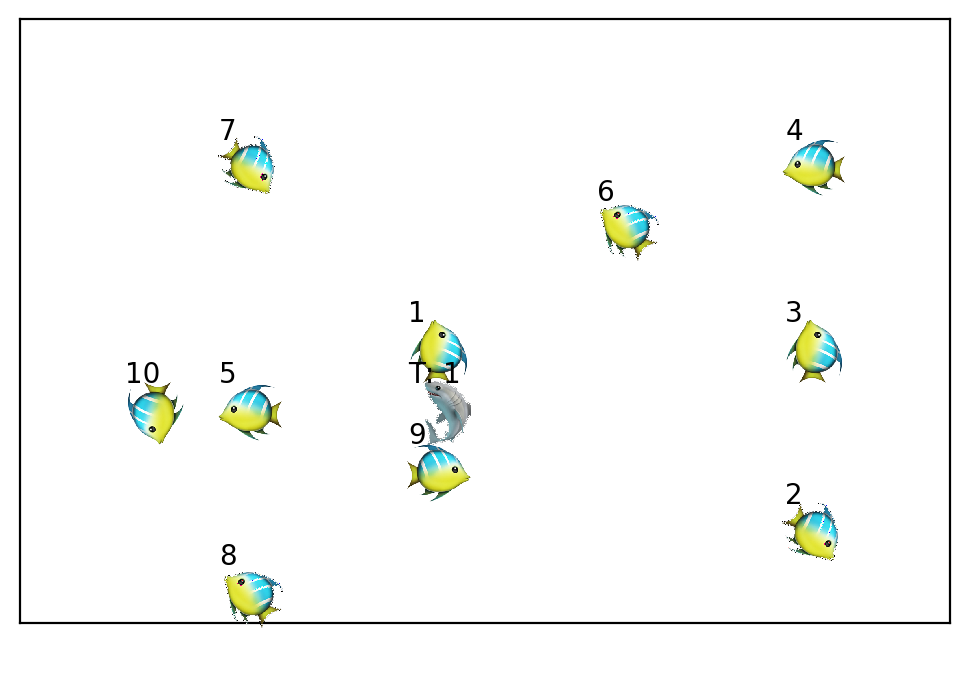

Step: 8
Agent-Specific Rewards: {0: {'survival': 0, 'attraction': 0.1, 'repulsion': 0.0, 'alignment': -0.0611111111111111, 'sum': 0.0388888888888889}, 1: {'survival': 0, 'attraction': 0.07777777777777778, 'repulsion': -0.011111111111111112, 'alignment': -0.06341229756873942, 'sum': 0.0032543690979272427}, 2: {'survival': 0, 'attraction': 0.06666666666666667, 'repulsion': -0.011111111111111112, 'alignment': -0.05, 'sum': 0.00555555555555555}, 3: {'survival': 0, 'attraction': 0.05555555555555555, 'repulsion': -0.011111111111111112, 'alignment': -0.05, 'sum': -0.005555555555555564}, 4: {'survival': 0, 'attraction': 0.05555555555555555, 'repulsion': -0.011111111111111112, 'alignment': -0.04769881354237169, 'sum': -0.0032543690979272497}, 5: {'survival': 0, 'attraction': 0.06666666666666667, 'repulsion': -0.011111111111111112, 'alignment': -0.05, 'sum': 0.00555555555555555}, 6: {'survival': 0, 'attraction': 0.07777777777777778, 'repulsion': -0.011111111111111112, 'alignment': -0.06111111111

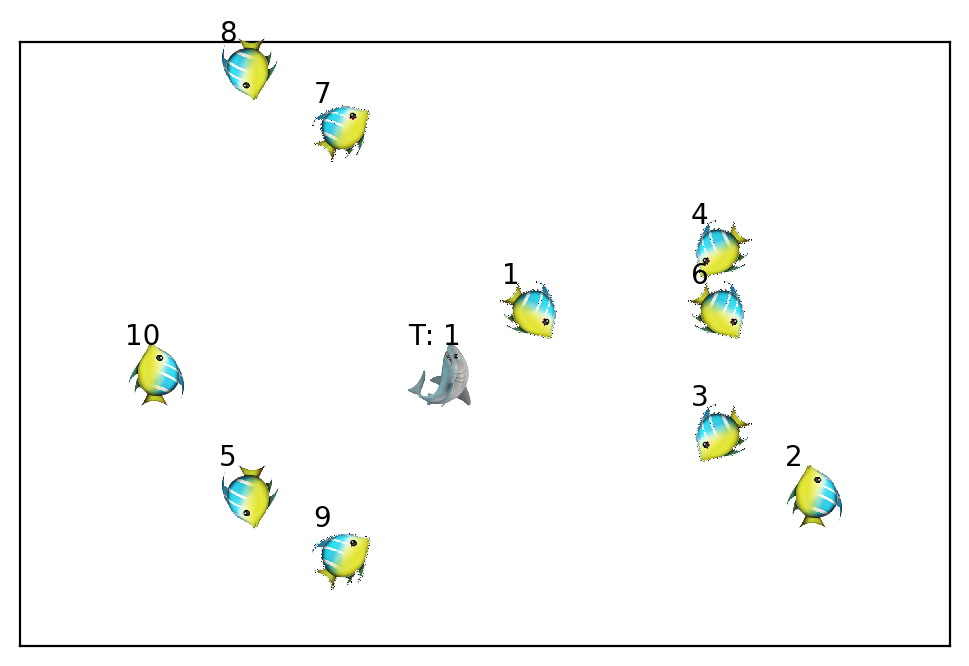

Step: 9
Agent-Specific Rewards: {0: {'survival': 0, 'attraction': 0.06666666666666667, 'repulsion': -0.011111111111111112, 'alignment': -0.05718274010451918, 'sum': -0.0016271845489636283}, 1: {'survival': 0, 'attraction': 0.06666666666666667, 'repulsion': 0.0, 'alignment': -0.05392837100659193, 'sum': 0.012738295660074735}, 2: {'survival': 0, 'attraction': 0.07777777777777778, 'repulsion': 0.0, 'alignment': -0.056229557464220245, 'sum': 0.021548220313557534}, 3: {'survival': 0, 'attraction': 0.06666666666666667, 'repulsion': 0.0, 'alignment': -0.056229557464220245, 'sum': 0.01043710920244642}, 4: {'survival': 0, 'attraction': 0.06666666666666667, 'repulsion': -0.011111111111111112, 'alignment': -0.056229557464220245, 'sum': -0.0006740019086646926}, 5: {'survival': 0, 'attraction': 0.06666666666666667, 'repulsion': -0.011111111111111112, 'alignment': -0.05488155364689087, 'sum': 0.0006740019086646856}, 6: {'survival': 0, 'attraction': 0.05555555555555555, 'repulsion': 0.0, 'alignment':

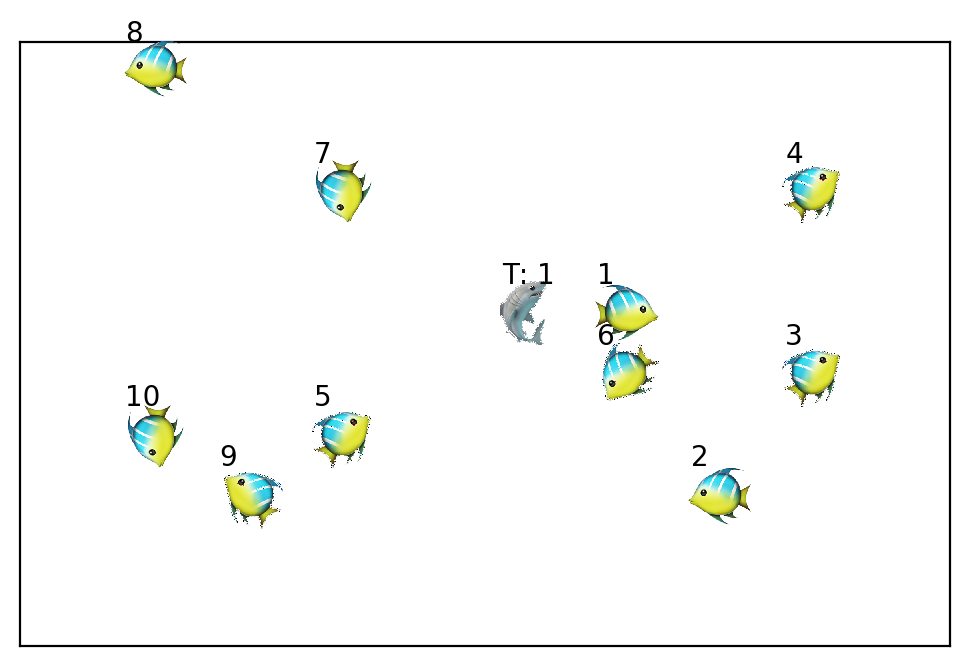

Step: 10
Agent-Specific Rewards: {0: {'survival': 0, 'attraction': 0, 'repulsion': 0, 'alignment': 0, 'sum': 0}, 1: {'survival': 0, 'attraction': 0, 'repulsion': 0, 'alignment': 0, 'sum': 0}, 2: {'survival': 0, 'attraction': 0, 'repulsion': 0, 'alignment': 0, 'sum': 0}, 3: {'survival': 0, 'attraction': 0, 'repulsion': 0, 'alignment': 0, 'sum': 0}, 4: {'survival': 0, 'attraction': 0, 'repulsion': 0, 'alignment': 0, 'sum': 0}, 5: {'survival': -10, 'attraction': 0, 'repulsion': 0, 'alignment': 0, 'sum': -10}, 6: {'survival': 0, 'attraction': 0, 'repulsion': 0, 'alignment': 0, 'sum': 0}, 7: {'survival': 0, 'attraction': 0, 'repulsion': 0, 'alignment': 0, 'sum': 0}, 8: {'survival': 0, 'attraction': 0, 'repulsion': 0, 'alignment': 0, 'sum': 0}, 9: {'survival': 0, 'attraction': 0, 'repulsion': 0, 'alignment': 0, 'sum': 0}, 'global': {'survival': -10, 'attraction': 0, 'repulsion': 0, 'alignment': 0, 'sum': -10}}


/Users/rtl/anaconda2/envs/swarm/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


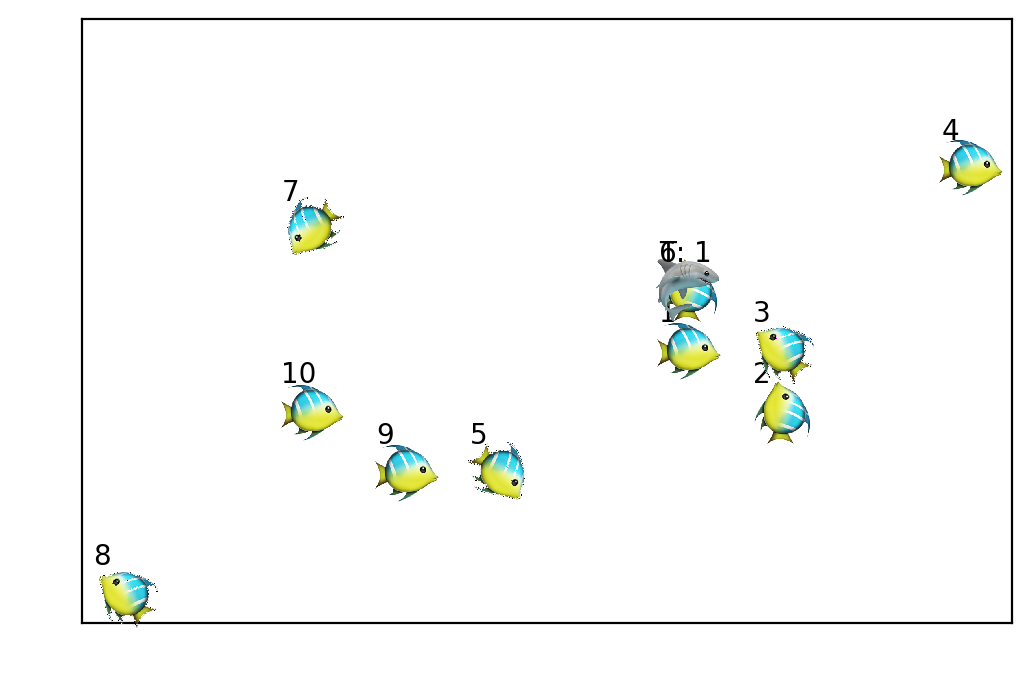

In [7]:
# Run a few steps with the random agent and global reward
state = env.reset()
for i in range(max_steps):
    action = random_agent.random_action()
    next_state, rewards, done, _ = env.step(action, reward_type={"attraction": True,
                                                                 "repulsion": True,
                                                                 "alignment": True,
                                                                 "indiv_rewards": True,
                                                                 "vf_size": None})
    state = next_state
    print("Step: {}".format(i + 1))
    print("Agent-Specific Rewards: {}".format(rewards))
    env.render()
    if done:
        break

In [8]:
# Run a few steps with the random agent and global reward
state = env.reset()
for i in range(max_steps):
    action = random_agent.random_action()
    next_state, rewards, done, _ = env.step(action, reward_type={"attraction": False,
                                                                 "repulsion": False,
                                                                 "alignment": False,
                                                                 "indiv_rewards": True,
                                                                 "vf_size": None})
    state = next_state
    print("Step: {}".format(i + 1))
    print("Agent-Specific Rewards: {}".format(rewards))
    # env.render()
    if done:
        break

Step: 1
Agent-Specific Rewards: {0: {'survival': 0, 'attraction': 0.0, 'repulsion': 0.0, 'alignment': -0.0, 'sum': 0.0}, 1: {'survival': 0, 'attraction': 0.0, 'repulsion': 0.0, 'alignment': -0.0, 'sum': 0.0}, 2: {'survival': 0, 'attraction': 0.0, 'repulsion': 0.0, 'alignment': -0.0, 'sum': 0.0}, 3: {'survival': 0, 'attraction': 0.0, 'repulsion': 0.0, 'alignment': -0.0, 'sum': 0.0}, 4: {'survival': 0, 'attraction': 0.0, 'repulsion': 0.0, 'alignment': -0.0, 'sum': 0.0}, 5: {'survival': 0, 'attraction': 0.0, 'repulsion': 0.0, 'alignment': -0.0, 'sum': 0.0}, 6: {'survival': 0, 'attraction': 0.0, 'repulsion': 0.0, 'alignment': -0.0, 'sum': 0.0}, 7: {'survival': 0, 'attraction': 0.0, 'repulsion': 0.0, 'alignment': -0.0, 'sum': 0.0}, 8: {'survival': 0, 'attraction': 0.0, 'repulsion': 0.0, 'alignment': -0.0, 'sum': 0.0}, 9: {'survival': 0, 'attraction': 0.0, 'repulsion': 0.0, 'alignment': -0.0, 'sum': 0.0}, 'global': {'survival': 0, 'attraction': 0.0, 'repulsion': 0.0, 'alignment': -0.0, 'sum'

In [9]:
# Run a few steps with the random agent and global reward
state = env.reset()
for i in range(max_steps):
    action = random_agent.random_action()
    next_state, rewards, done, _ = env.step(action, reward_type={"attraction": True,
                                                                 "repulsion": True,
                                                                 "alignment": False,
                                                                 "indiv_rewards": True,
                                                                 "vf_size": None})
    state = next_state
    print("Step: {}".format(i + 1))
    print("Agent-Specific Rewards: {}".format(rewards))
    # env.render()
    if done:
        break

Step: 1
Agent-Specific Rewards: {0: {'survival': 0, 'attraction': 0.07777777777777778, 'repulsion': -0.011111111111111112, 'alignment': -0.0, 'sum': 0.06666666666666667}, 1: {'survival': 0, 'attraction': 0.044444444444444446, 'repulsion': -0.022222222222222223, 'alignment': -0.0, 'sum': 0.022222222222222223}, 2: {'survival': 0, 'attraction': 0.06666666666666667, 'repulsion': -0.011111111111111112, 'alignment': -0.0, 'sum': 0.05555555555555555}, 3: {'survival': 0, 'attraction': 0.06666666666666667, 'repulsion': -0.011111111111111112, 'alignment': -0.0, 'sum': 0.05555555555555555}, 4: {'survival': 0, 'attraction': 0.06666666666666667, 'repulsion': -0.011111111111111112, 'alignment': -0.0, 'sum': 0.05555555555555555}, 5: {'survival': 0, 'attraction': 0.06666666666666667, 'repulsion': -0.011111111111111112, 'alignment': -0.0, 'sum': 0.05555555555555555}, 6: {'survival': 0, 'attraction': 0.07777777777777778, 'repulsion': -0.011111111111111112, 'alignment': -0.0, 'sum': 0.06666666666666667},

In [10]:
env = gym.make("Swarm-v0")

agents_list = np.arange(5, 1000, 100).tolist()
num_runs = 5

mean_init_time = np.zeros((len(agents_list)))
sd_init_time = np.zeros((len(agents_list)))

mean_exec_time = np.zeros((len(agents_list)))
sd_exec_time = np.zeros((len(agents_list)))

for i, n_agents in enumerate(agents_list):
    init_time_temp = []
    exec_time_temp = []
    
    for run in range(num_runs):
        start = time.time()
        env.set_env_parameters(num_agents=n_agents,
                               obs_space_size=10000,
                               verbose=False)
        state = env.reset()
        total_init = time.time() - start
        init_time_temp.append(total_init)

        random_agent = RandomAgents(env)
        action = random_agent.random_action()

        start = time.time()
        next_state, reward, done, _ = env.step(action)
        total_exec = time.time() - start
        exec_time_temp.append(total_exec)
    
    mean_init_time[i] = np.array(init_time_temp).mean()
    sd_init_time[i] = np.array(init_time_temp).std()

    mean_exec_time[i] = np.array(exec_time_temp).mean()
    sd_exec_time[i] = np.array(exec_time_temp).std()


/Users/rtl/anaconda2/envs/swarm/lib/python3.6/site-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)


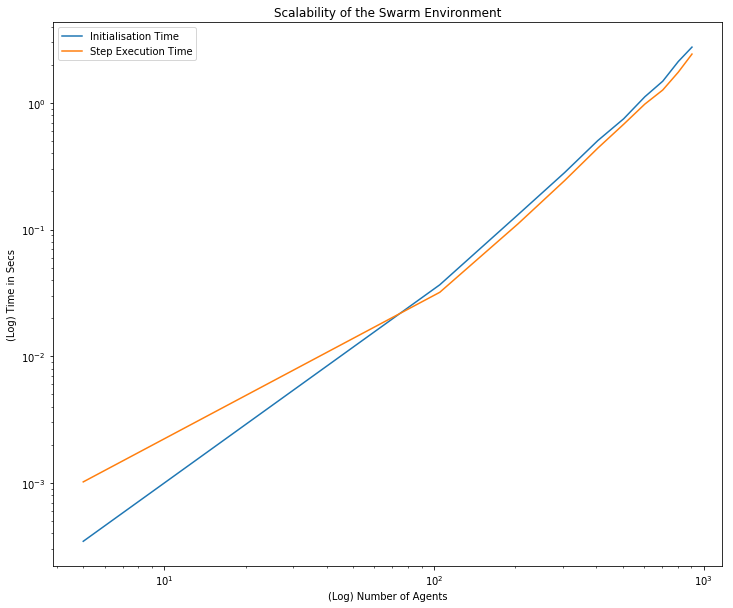

In [11]:
plt.figure(figsize=(12,10))
plt.loglog(agents_list, mean_init_time, label="Initialisation Time")
#plt.fill_between(agents_list,
#                 mean_init_time - 2*sd_init_time,
#                 mean_init_time + 2*sd_init_time,
#                 alpha=0.25)

plt.loglog(agents_list, mean_exec_time, label="Step Execution Time")
#plt.fill_between(agents_list,
#                 mean_exec_time - 2*sd_exec_time,
#                 mean_exec_time + 2*sd_exec_time,
#                 alpha=0.25)

plt.xlabel("(Log) Number of Agents")
plt.ylabel("(Log) Time in Secs")
plt.title("Scalability of the Swarm Environment")
plt.legend(loc=2)

plt.savefig("gym_swarm/images/scalability.png", dpi=300)